In [2]:
import pandas as pd

# Load the saved CSV file
data = pd.read_csv('processed_data.csv')


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import torch
from torch.utils.data import Dataset, DataLoader

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Define target and input variables
target_cols = ['meanLineIntensity', 'meanNumPixels15']
input_cols = ['Z', 'd_edge_left', 'd_edge_right', 'NoLines', 'd_over_left'] 

# Extract features and targets
X = data[input_cols].values
y = data[target_cols].values

# Create a custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X)
        self.y = torch.FloatTensor(y)
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Function to prepare data loaders for a specific fold
def prepare_fold_data(X, y, train_idx, val_idx, batch_size=32):
    # StandardScaler for features
    scaler = StandardScaler()
    scaler_y = StandardScaler()  
    
    # Scale features
    X_train = scaler.fit_transform(X[train_idx])
    X_val = scaler.transform(X[val_idx])
    
    # Scale targets
    y_train = scaler_y.fit_transform(y[train_idx])
    y_val = scaler_y.transform(y[val_idx])
    
    # Create datasets
    train_dataset = CustomDataset(X_train, y_train)
    val_dataset = CustomDataset(X_val, y_val)
    
    # Create data loaders 
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=True
    )
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False
    )
    
    return train_loader, val_loader, scaler, scaler_y

# Set up K-Fold cross-validation
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Store fold indices for later use
fold_indices = []
for train_idx, val_idx in kf.split(X):
    fold_indices.append((train_idx, val_idx))



Training Fold 1
--------------------------------------------------
Total Parameters: 266,606,594
Epoch [10/10000], Train Loss: 0.330472, Val Loss: 0.368814
Epoch [20/10000], Train Loss: 0.268836, Val Loss: 0.290824
Epoch [30/10000], Train Loss: 0.235230, Val Loss: 0.378089
Epoch [40/10000], Train Loss: 0.225854, Val Loss: 0.241322
Epoch [50/10000], Train Loss: 0.243165, Val Loss: 0.354227
Epoch [60/10000], Train Loss: 0.182933, Val Loss: 0.219687
Epoch [70/10000], Train Loss: 0.197430, Val Loss: 0.228171
Epoch [80/10000], Train Loss: 0.183253, Val Loss: 0.246879
Epoch [90/10000], Train Loss: 0.178180, Val Loss: 0.246124
Epoch [100/10000], Train Loss: 0.146881, Val Loss: 0.237309
Epoch [110/10000], Train Loss: 0.152180, Val Loss: 0.235962
Epoch [120/10000], Train Loss: 0.190311, Val Loss: 0.207200
Epoch [130/10000], Train Loss: 0.160353, Val Loss: 0.207254
Epoch [140/10000], Train Loss: 0.139036, Val Loss: 0.179232
Epoch [150/10000], Train Loss: 0.137132, Val Loss: 0.182675
Epoch [160/

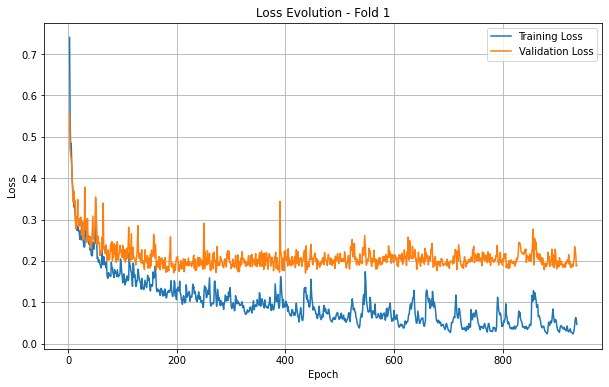

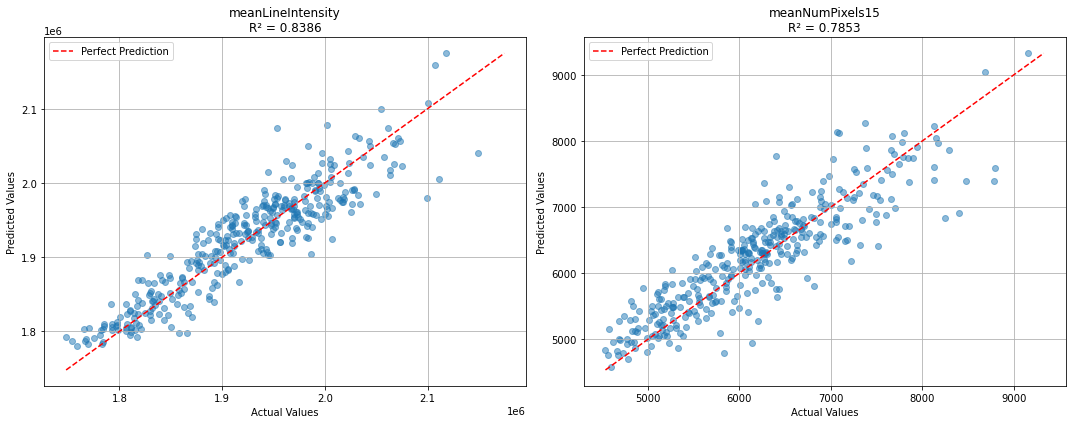


Evaluation Metrics:
MSE: 494620024.9477
R² (meanLineIntensity): 0.8386
R² (meanNumPixels15): 0.7853
Fold 1 Validation MSE: 494620024.9477
Fold 1 R² scores: ['0.8386', '0.7853']

Training Fold 2
--------------------------------------------------
Total Parameters: 266,606,594
Epoch [10/10000], Train Loss: 0.343279, Val Loss: 0.369195
Epoch [20/10000], Train Loss: 0.257288, Val Loss: 0.288070
Epoch [30/10000], Train Loss: 0.221468, Val Loss: 0.249800
Epoch [40/10000], Train Loss: 0.188286, Val Loss: 0.233584
Epoch [50/10000], Train Loss: 0.176243, Val Loss: 0.238424
Epoch [60/10000], Train Loss: 0.167643, Val Loss: 0.247740
Epoch [70/10000], Train Loss: 0.158217, Val Loss: 0.225269
Epoch [80/10000], Train Loss: 0.169024, Val Loss: 0.264367
Epoch [90/10000], Train Loss: 0.173490, Val Loss: 0.242828
Epoch [100/10000], Train Loss: 0.158940, Val Loss: 0.247008
Epoch [110/10000], Train Loss: 0.167328, Val Loss: 0.247938
Epoch [120/10000], Train Loss: 0.160362, Val Loss: 0.246238
Epoch [130/10

Epoch [1330/10000], Train Loss: 0.065079, Val Loss: 0.219028
Epoch [1340/10000], Train Loss: 0.024004, Val Loss: 0.190578
Epoch [1350/10000], Train Loss: 0.040612, Val Loss: 0.212120
Epoch [1360/10000], Train Loss: 0.040813, Val Loss: 0.186752
Epoch [1370/10000], Train Loss: 0.020780, Val Loss: 0.178904
Epoch [1380/10000], Train Loss: 0.020912, Val Loss: 0.187078
Epoch [1390/10000], Train Loss: 0.012282, Val Loss: 0.187710
Epoch [1400/10000], Train Loss: 0.019527, Val Loss: 0.181632
Epoch [1410/10000], Train Loss: 0.073976, Val Loss: 0.197183
Epoch [1420/10000], Train Loss: 0.044996, Val Loss: 0.217887
Epoch [1430/10000], Train Loss: 0.022229, Val Loss: 0.203030
Epoch [1440/10000], Train Loss: 0.015719, Val Loss: 0.193361
Epoch [1450/10000], Train Loss: 0.007745, Val Loss: 0.194691
Epoch [1460/10000], Train Loss: 0.016276, Val Loss: 0.200667
Epoch [1470/10000], Train Loss: 0.019001, Val Loss: 0.193952
Epoch [1480/10000], Train Loss: 0.024960, Val Loss: 0.201596
Epoch [1490/10000], Trai

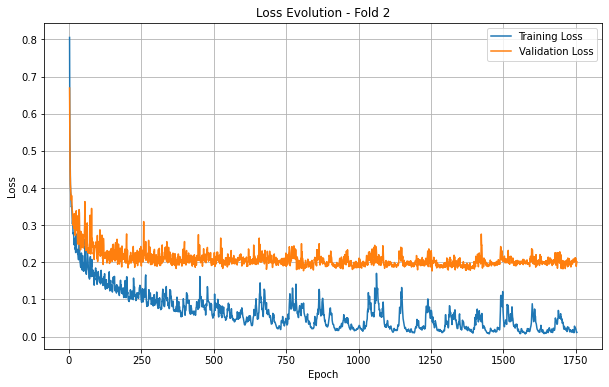

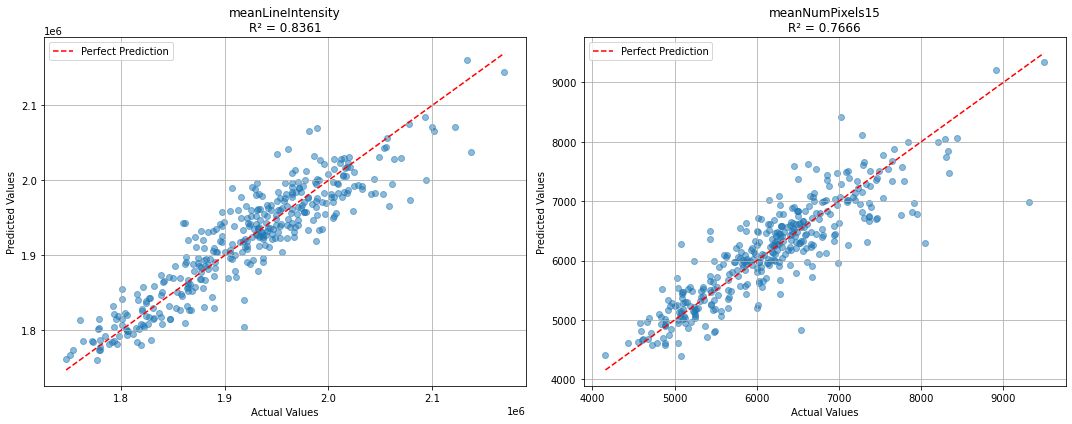


Evaluation Metrics:
MSE: 508672309.0689
R² (meanLineIntensity): 0.8361
R² (meanNumPixels15): 0.7666
Fold 2 Validation MSE: 508672309.0689
Fold 2 R² scores: ['0.8361', '0.7666']

Training Fold 3
--------------------------------------------------
Total Parameters: 266,606,594
Epoch [10/10000], Train Loss: 0.364685, Val Loss: 0.420170
Epoch [20/10000], Train Loss: 0.268031, Val Loss: 0.352950
Epoch [30/10000], Train Loss: 0.237240, Val Loss: 0.325165
Epoch [40/10000], Train Loss: 0.192323, Val Loss: 0.347291
Epoch [50/10000], Train Loss: 0.220137, Val Loss: 0.288935
Epoch [60/10000], Train Loss: 0.177261, Val Loss: 0.289192
Epoch [70/10000], Train Loss: 0.197176, Val Loss: 0.321965
Epoch [80/10000], Train Loss: 0.159271, Val Loss: 0.287536
Epoch [90/10000], Train Loss: 0.162201, Val Loss: 0.303526
Epoch [100/10000], Train Loss: 0.204100, Val Loss: 0.334193
Epoch [110/10000], Train Loss: 0.161999, Val Loss: 0.273600
Epoch [120/10000], Train Loss: 0.135956, Val Loss: 0.295975
Epoch [130/10

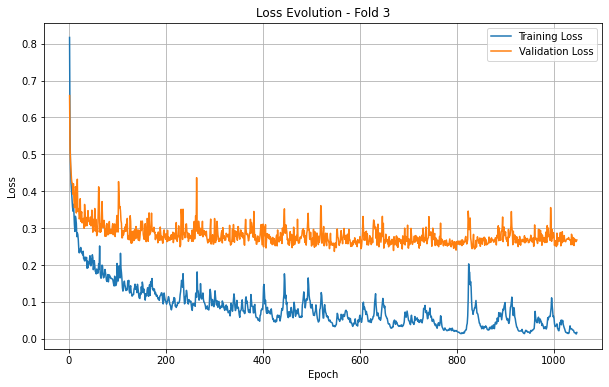

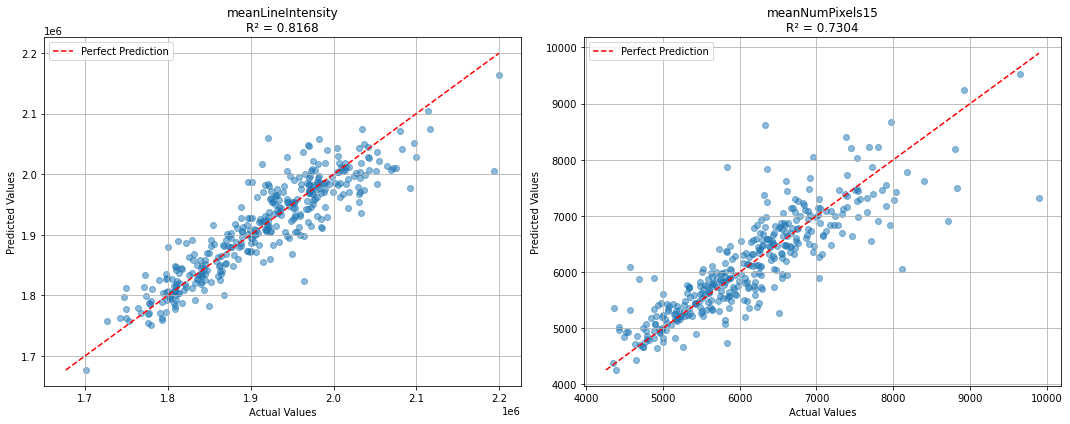


Evaluation Metrics:
MSE: 665622418.2099
R² (meanLineIntensity): 0.8168
R² (meanNumPixels15): 0.7304
Fold 3 Validation MSE: 665622418.2099
Fold 3 R² scores: ['0.8168', '0.7304']

Training Fold 4
--------------------------------------------------
Total Parameters: 266,606,594
Epoch [10/10000], Train Loss: 0.374597, Val Loss: 0.424579
Epoch [20/10000], Train Loss: 0.297563, Val Loss: 0.347041
Epoch [30/10000], Train Loss: 0.237538, Val Loss: 0.362609
Epoch [40/10000], Train Loss: 0.219443, Val Loss: 0.323248
Epoch [50/10000], Train Loss: 0.201956, Val Loss: 0.301916
Epoch [60/10000], Train Loss: 0.190989, Val Loss: 0.263052
Epoch [70/10000], Train Loss: 0.183871, Val Loss: 0.278061
Epoch [80/10000], Train Loss: 0.162896, Val Loss: 0.367040
Epoch [90/10000], Train Loss: 0.149566, Val Loss: 0.224280
Epoch [100/10000], Train Loss: 0.161082, Val Loss: 0.267964
Epoch [110/10000], Train Loss: 0.167909, Val Loss: 0.269254
Epoch [120/10000], Train Loss: 0.139589, Val Loss: 0.245159
Epoch [130/10

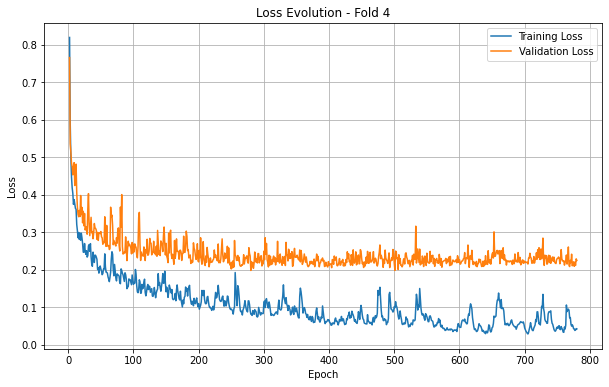

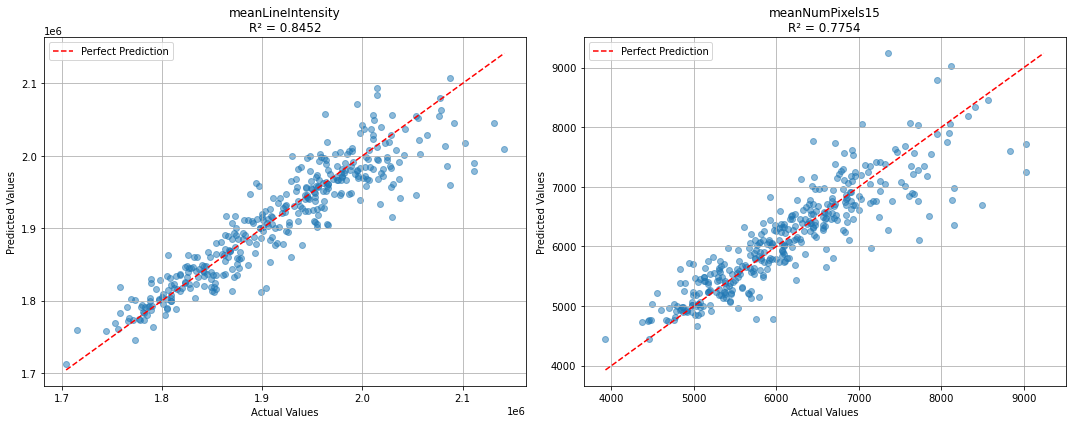


Evaluation Metrics:
MSE: 569409406.9392
R² (meanLineIntensity): 0.8452
R² (meanNumPixels15): 0.7754
Fold 4 Validation MSE: 569409406.9392
Fold 4 R² scores: ['0.8452', '0.7754']

Training Fold 5
--------------------------------------------------
Total Parameters: 266,606,594
Epoch [10/10000], Train Loss: 0.357421, Val Loss: 0.400279
Epoch [20/10000], Train Loss: 0.288613, Val Loss: 0.321073
Epoch [30/10000], Train Loss: 0.254802, Val Loss: 0.293791
Epoch [40/10000], Train Loss: 0.242754, Val Loss: 0.331859
Epoch [50/10000], Train Loss: 0.185522, Val Loss: 0.273085
Epoch [60/10000], Train Loss: 0.200102, Val Loss: 0.274102
Epoch [70/10000], Train Loss: 0.168738, Val Loss: 0.283875
Epoch [80/10000], Train Loss: 0.181148, Val Loss: 0.266411
Epoch [90/10000], Train Loss: 0.164676, Val Loss: 0.268872
Epoch [100/10000], Train Loss: 0.156903, Val Loss: 0.241595
Epoch [110/10000], Train Loss: 0.164800, Val Loss: 0.244914
Epoch [120/10000], Train Loss: 0.167836, Val Loss: 0.264733
Epoch [130/10

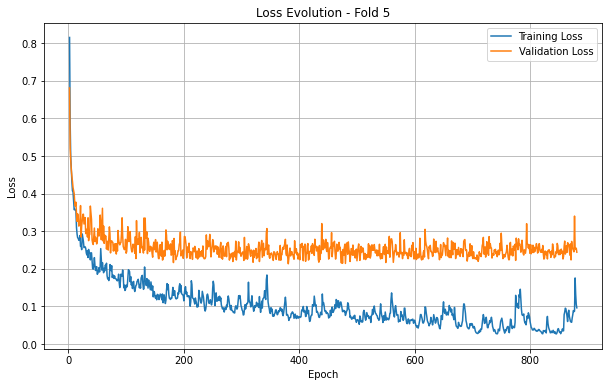

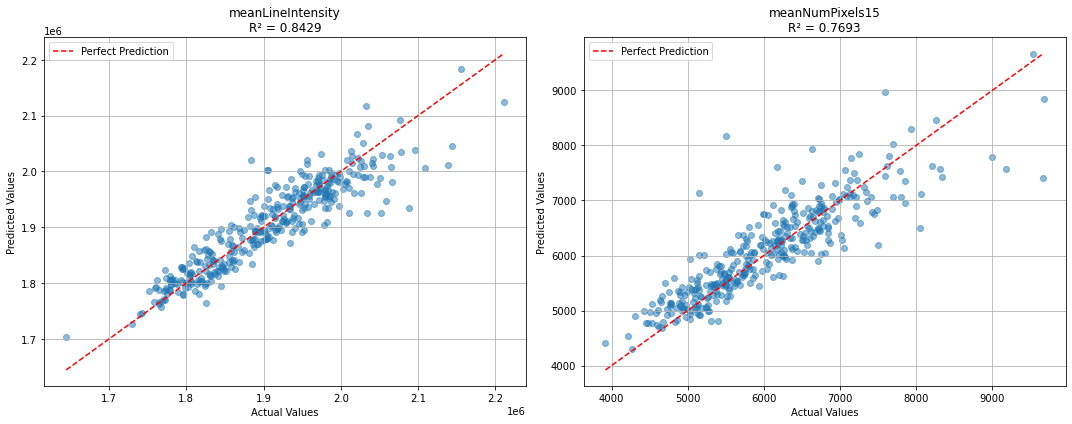


Evaluation Metrics:
MSE: 600750264.5746
R² (meanLineIntensity): 0.8429
R² (meanNumPixels15): 0.7693
Fold 5 Validation MSE: 600750264.5746
Fold 5 R² scores: ['0.8429', '0.7693']

Cross-validation Results:
Average MSE: 567814884.7481 ± 62464273.1590
Average R² (meanLineIntensity): 0.8359 ± 0.0101
Average R² (meanNumPixels15): 0.7654 ± 0.0186
------------------------------

Cross-validation Results:
Average MSE: 567814884.7481 ± 62464273.1590


In [4]:
import torch.nn as nn
import torch.optim as optim
import tqdm
from tqdm import tqdm
import copy
import matplotlib.pyplot as plt

class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout_rate=0.2):
        super(ResidualBlock, self).__init__()
        self.block = nn.Sequential(
            nn.Linear(dim, dim),
            #nn.BatchNorm1d(dim),
            nn.ReLU(),
            #nn.Dropout(dropout_rate),
            nn.Linear(dim, dim),
            #nn.BatchNorm1d(dim)
        )
        self.relu = nn.ReLU()
        
    def forward(self, x):
        residual = x
        out = self.block(x)
        out += residual  # Skip connection
        return self.relu(out)

class MLPRegressor(nn.Module):
    def __init__(self, input_dim=5, hidden_dim=128, num_layers=3, output_dim=2, dropout_rate=0.2):
        super(MLPRegressor, self).__init__()
        
        self.input_layer = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            #nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            #nn.Dropout(dropout_rate)
        )
        
        self.residual_layers = nn.ModuleList([
            ResidualBlock(hidden_dim, dropout_rate) 
            for _ in range(num_layers - 1)
        ])
        
        self.output_layer = nn.Linear(hidden_dim, output_dim)
        
    def forward(self, x):
        x = self.input_layer(x)
        for layer in self.residual_layers:
            x = layer(x)
        return self.output_layer(x)

def print_model_params(model):
    total_params = 0
    input_params = sum(p.numel() for p in model.input_layer.parameters())
    total_params += input_params
    
    for i, block in enumerate(model.residual_layers):
        block_params = sum(p.numel() for p in block.parameters())
        total_params += block_params
    
    output_params = sum(p.numel() for p in model.output_layer.parameters())
    total_params += output_params
    
    print("-" * 50)
    print(f"Total Parameters: {total_params:,}")

def train_model(model, train_loader, val_loader, num_epochs=1000, patience=50):
    model = model.to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.00001)

    best_val_loss = float('inf')
    best_model = None
    patience_counter = 0
    
    # Lists to store losses for plotting
    train_losses = []
    val_losses = []
    epochs = []

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss = 0.0
        for X_batch, y_batch in train_loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)

            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * X_batch.size(0)

        train_loss /= len(train_loader.dataset)

        # Validation phase
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for X_batch, y_batch in val_loader:
                X_batch, y_batch = X_batch.to(device), y_batch.to(device)
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_loss += loss.item() * X_batch.size(0)

        val_loss /= len(val_loader.dataset)

        # Store losses for plotting
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        epochs.append(epoch + 1)

        # Early stopping check
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model = copy.deepcopy(model)
            patience_counter = 0
        else:
            patience_counter += 1

        if patience_counter >= patience:
            print(f'Early stopping triggered at epoch {epoch+1}')
            break

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

    return best_model, train_losses, val_losses, epochs

def train_k_fold(X, y, fold_indices, hidden_dim=128, num_layers=3, batch_size=32):
    models = []
    scalers = []
    scalers_y = []
    val_scores = []
    r2_scores_all = []

    for fold, (train_idx, val_idx) in enumerate(fold_indices):
        print(f'\nTraining Fold {fold+1}')

        # Prepare data for this fold
        train_loader, val_loader, scaler, scaler_y = prepare_fold_data(
            X, y, train_idx, val_idx, batch_size
        )

        # Initialize model
        model = MLPRegressor(
            input_dim=X.shape[1],
            hidden_dim=hidden_dim,
            num_layers=num_layers,
            output_dim=y.shape[1]
        )
        
        print_model_params(model)

        # Train model and get loss history
        best_model, train_losses, val_losses, epochs = train_model(
            model,
            train_loader,
            val_loader,
            num_epochs=10000,
            patience=500
        )

        # Plot loss evolution for this fold
        plt.figure(figsize=(10, 6))
        plt.plot(epochs[1:], train_losses[1:], label='Training Loss')
        plt.plot(epochs[1:], val_losses[1:], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.title(f'Loss Evolution - Fold {fold+1}')
        plt.legend()
        plt.grid(True)
        plt.show()

        # Store the trained model and scalers
        models.append(best_model)
        scalers.append(scaler)
        scalers_y.append(scaler_y)

        # Calculate validation scores
        mse, r2_scores, predictions, actuals = evaluate_model(best_model, val_loader, scaler_y)
        val_scores.append(mse)
        r2_scores_all.append(r2_scores)
        print(f'Fold {fold+1} Validation MSE: {mse:.4f}')
        print(f'Fold {fold+1} R² scores: {[f"{r2:.4f}" for r2 in r2_scores]}')

    # Calculate and print average metrics
    print("\nCross-validation Results:")
    print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")
    r2_scores_all = np.array(r2_scores_all)
    for i, target in enumerate(['meanLineIntensity', 'meanNumPixels15']):
        mean_r2 = np.mean(r2_scores_all[:, i])
        std_r2 = np.std(r2_scores_all[:, i])
        print(f"Average R² ({target}): {mean_r2:.4f} ± {std_r2:.4f}")
    
    return models, scalers, scalers_y, val_scores, r2_scores_all

def evaluate_model(model, data_loader, scaler_y):
    model = model.to(device)
    model.eval()
    criterion = nn.MSELoss()
    total_loss = 0.0

    # Lists to store predictions and actual values
    all_predictions = []
    all_actuals = []

    with torch.no_grad():
        for X_batch, y_batch in data_loader:
            X_batch = X_batch.to(device)
            outputs = model(X_batch)

            # Move to CPU and convert to numpy
            outputs_np = outputs.cpu().numpy()
            y_batch_np = y_batch.cpu().numpy()

            # Inverse transform
            outputs_inv = scaler_y.inverse_transform(outputs_np)
            y_batch_inv = scaler_y.inverse_transform(y_batch_np)

            # Compute loss in original scale
            loss = criterion(torch.tensor(outputs_inv), torch.tensor(y_batch_inv))
            total_loss += loss.item() * X_batch.size(0)

            all_predictions.append(outputs_inv)
            all_actuals.append(y_batch_inv)

    # Convert lists to numpy arrays
    predictions = np.vstack(all_predictions)
    actuals = np.vstack(all_actuals)

    # Calculate MSE
    mse = total_loss / len(data_loader.dataset)

    # Calculate R2 for each target
    r2_scores = []
    for i in range(actuals.shape[1]):
        ss_res = np.sum((actuals[:, i] - predictions[:, i]) ** 2)
        ss_tot = np.sum((actuals[:, i] - np.mean(actuals[:, i])) ** 2)
        r2 = 1 - (ss_res / ss_tot)
        r2_scores.append(r2)

    # Create plots
    import matplotlib.pyplot as plt

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    target_names = ['meanLineIntensity', 'meanNumPixels15']

    for i, (ax, target) in enumerate(zip(axes, target_names)):
        # Plot predicted vs actual
        ax.scatter(actuals[:, i], predictions[:, i], alpha=0.5)

        # Plot perfect prediction line
        min_val = min(actuals[:, i].min(), predictions[:, i].min())
        max_val = max(actuals[:, i].max(), predictions[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

        # Add labels and title
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{target}\nR² = {r2_scores[i]:.4f}')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

    # Print detailed metrics
    print("\nEvaluation Metrics:")
    print(f"MSE: {mse:.4f}")
    for i, target in enumerate(target_names):
        print(f"R² ({target}): {r2_scores[i]:.4f}")

    return mse, r2_scores, predictions, actuals


# Train the models
models, scalers, scalers_y, val_scores, r2_scores_all = train_k_fold(X, y, fold_indices, 
                                                                     hidden_dim=1024, 
                                                                     num_layers=128,
                                                                     batch_size=128)

print('---'*10)
# Print overall results
print("\nCross-validation Results:")
print(f"Average MSE: {np.mean(val_scores):.4f} ± {np.std(val_scores):.4f}")


In [5]:
import os
import json
import pickle
import torch
from datetime import datetime

def save_training_results(models, scalers, scalers_y, val_scores, r2_scores_all, input_cols, target_cols):
    # Create Results directory if it doesn't exist
    results_dir = "Results"
    if not os.path.exists(results_dir):
        os.makedirs(results_dir)
    
    # Create timestamped subdirectory for this training run
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    run_dir = os.path.join(results_dir, f"run_{timestamp}")
    os.makedirs(run_dir)
    
    # Save models
    models_dir = os.path.join(run_dir, "models")
    os.makedirs(models_dir)
    for i, model in enumerate(models):
        model_path = os.path.join(models_dir, f"model_fold_{i+1}.pt")
        torch.save(model.state_dict(), model_path)
    
    # Save scalers
    scalers_dir = os.path.join(run_dir, "scalers")
    os.makedirs(scalers_dir)
    for i, (scaler, scaler_y) in enumerate(zip(scalers, scalers_y)):
        # Save feature scaler
        scaler_path = os.path.join(scalers_dir, f"feature_scaler_fold_{i+1}.pkl")
        with open(scaler_path, 'wb') as f:
            pickle.dump(scaler, f)
        
        # Save target scaler
        scaler_y_path = os.path.join(scalers_dir, f"target_scaler_fold_{i+1}.pkl")
        with open(scaler_y_path, 'wb') as f:
            pickle.dump(scaler_y, f)
    
    # Save metrics and configuration
    metrics = {
        'input_features': input_cols,
        'target_variables': target_cols,
        'val_scores': val_scores.tolist() if isinstance(val_scores, np.ndarray) else val_scores,
        'r2_scores_all': r2_scores_all.tolist() if isinstance(r2_scores_all, np.ndarray) else r2_scores_all,
        'average_mse': float(np.mean(val_scores)),
        'mse_std': float(np.std(val_scores)),
        'average_r2_by_target': {
            target: {
                'mean': float(np.mean(r2_scores_all[:, i])),
                'std': float(np.std(r2_scores_all[:, i]))
            }
            for i, target in enumerate(target_cols)
        }
    }
    
    metrics_path = os.path.join(run_dir, "metrics.json")
    with open(metrics_path, 'w') as f:
        json.dump(metrics, f, indent=4)
    
    print(f"\nResults saved in: {run_dir}")
    print("Saved contents:")
    print(f"- {len(models)} models")
    print(f"- {len(scalers)} feature scalers and target scalers")
    print("- Evaluation metrics and configuration")

# Call the function to save the results
save_training_results(
    models=models,
    scalers=scalers,
    scalers_y=scalers_y,  
    val_scores=val_scores,
    r2_scores_all=r2_scores_all,
    input_cols=input_cols,
    target_cols=target_cols
)


Results saved in: Results/run_20241118_114750
Saved contents:
- 5 models
- 5 feature scalers and target scalers
- Evaluation metrics and configuration


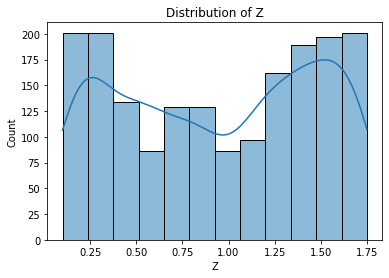

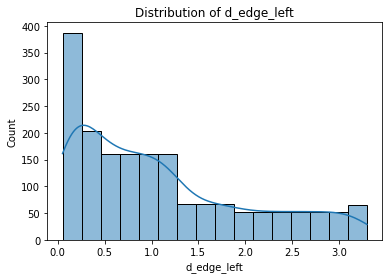

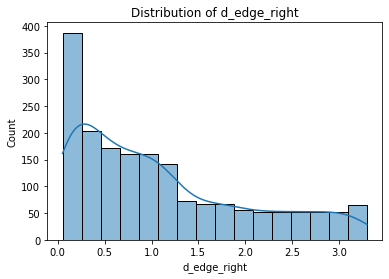

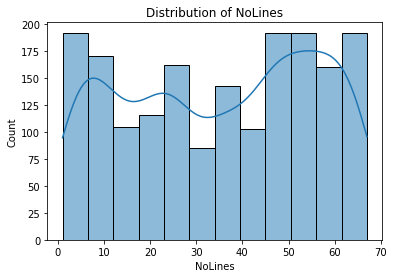

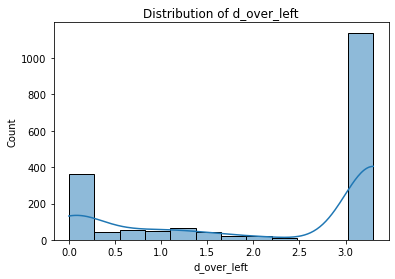

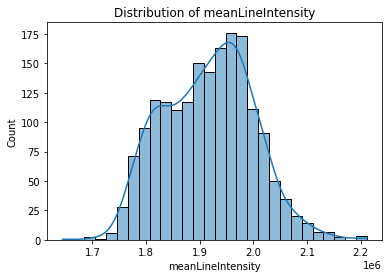

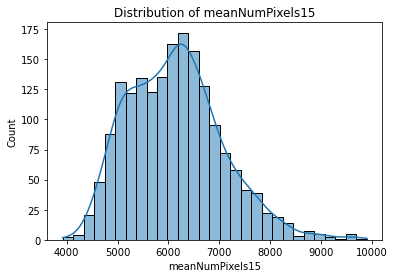

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot histograms for each feature
for col in input_cols + target_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


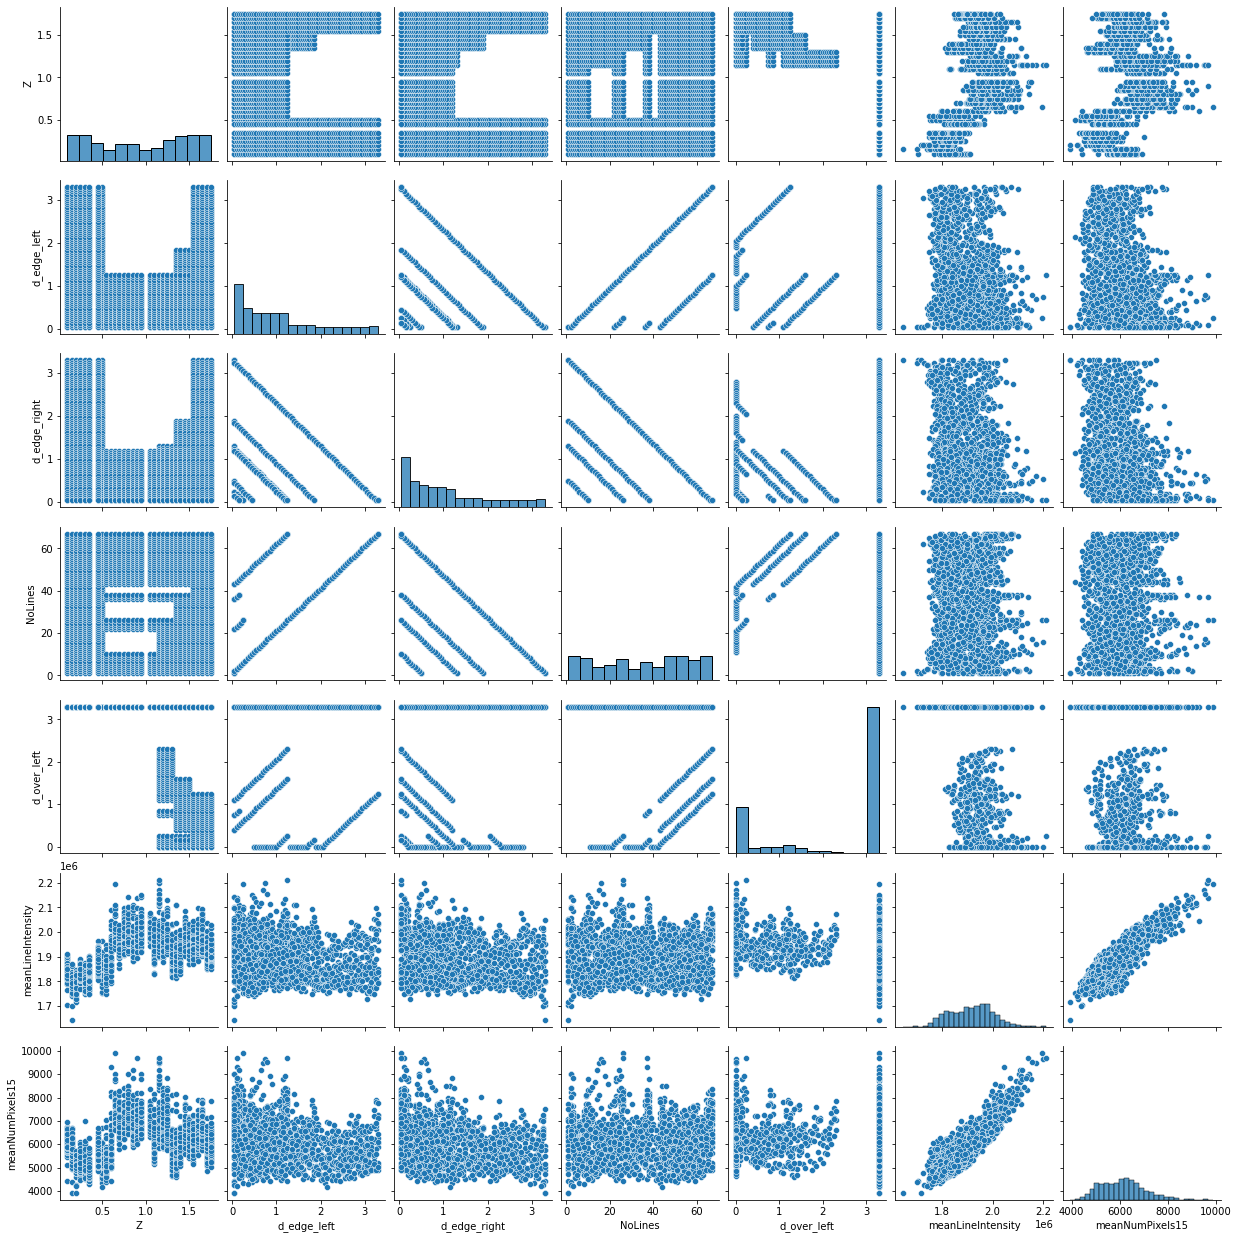

In [7]:
import seaborn as sns

sns.pairplot(data[input_cols + target_cols])
plt.show()


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

r2s = []
for fold_no, indices in enumerate(fold_indices):
    
    X_train, X_val = X[indices[0]], X[indices[1]]
    y_train, y_val = y[indices[0]], y[indices[1]]

    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    y_pred = lr_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred, multioutput='raw_values')
    print(f'Fold:  {fold_no}')
    print(f'Linear Regression MSE: {mse:.4f}')
    print(f'Linear Regression R² scores: {r2}')
    r2s.append(r2)

r2s = np.array(r2s)
mean_score = r2s.mean(axis=0)
print(f'Cross-validation mean score {mean_score}')

Fold:  0
Linear Regression MSE: 1517265336.1435
Linear Regression R² scores: [0.50493267 0.31038152]
Fold:  1
Linear Regression MSE: 1674725009.4159
Linear Regression R² scores: [0.46052306 0.2421029 ]
Fold:  2
Linear Regression MSE: 1788748953.9105
Linear Regression R² scores: [0.50765321 0.31165992]
Fold:  3
Linear Regression MSE: 1667596721.9200
Linear Regression R² scores: [0.5465519  0.30141716]
Fold:  4
Linear Regression MSE: 1742148453.7266
Linear Regression R² scores: [0.54435967 0.32484261]
Cross-validation mean score [0.5128041  0.29808082]


Fold:  0
Random Forest MSE: 455124564.9925
Random Forest R² scores: [0.85149754 0.79474304]


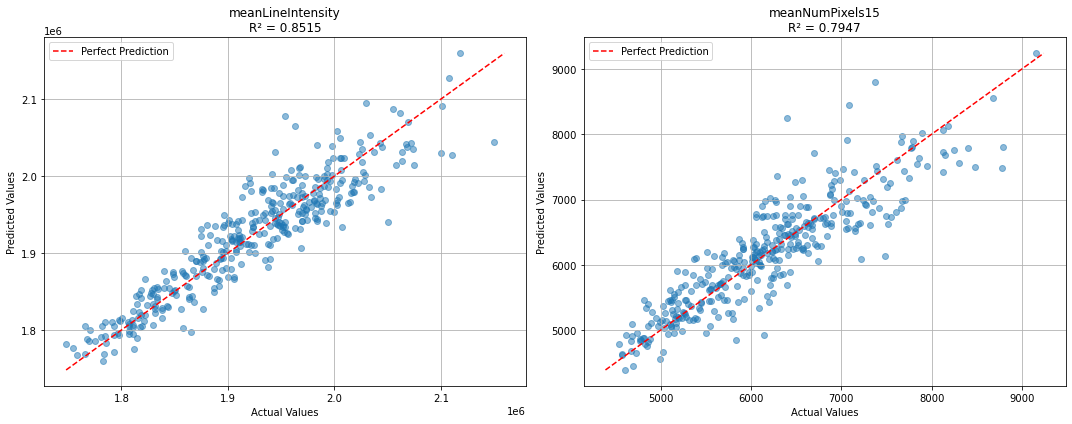

Fold:  1
Random Forest MSE: 498089766.6446
Random Forest R² scores: [0.83955101 0.77458291]


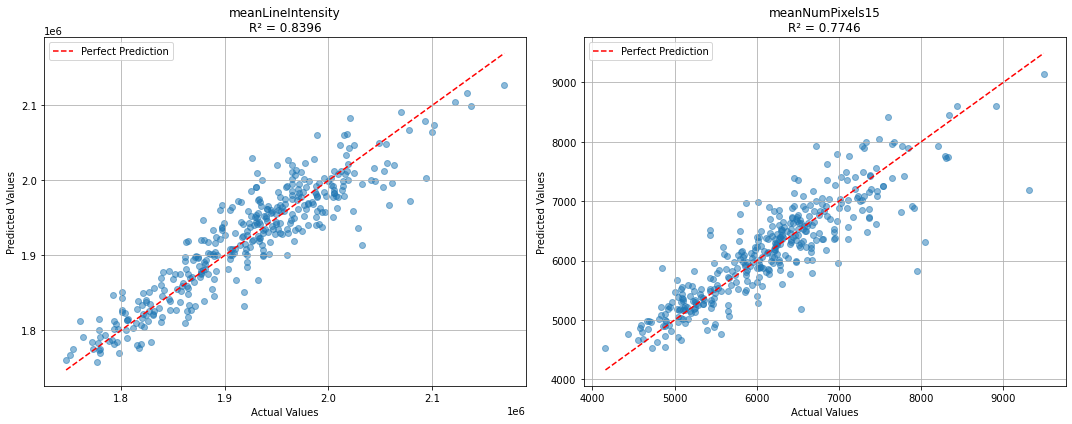

Fold:  2
Random Forest MSE: 587661507.0319
Random Forest R² scores: [0.83824824 0.77398236]


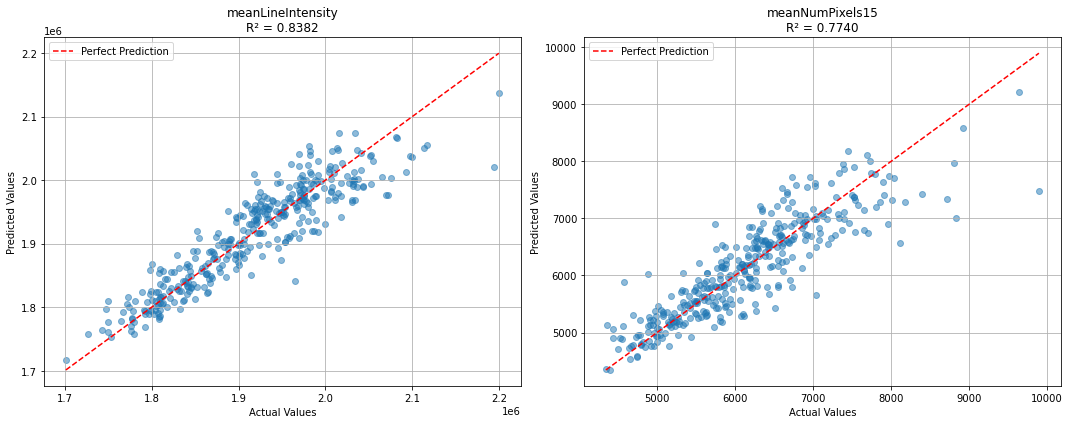

Fold:  3
Random Forest MSE: 553431335.4034
Random Forest R² scores: [0.84951131 0.77858343]


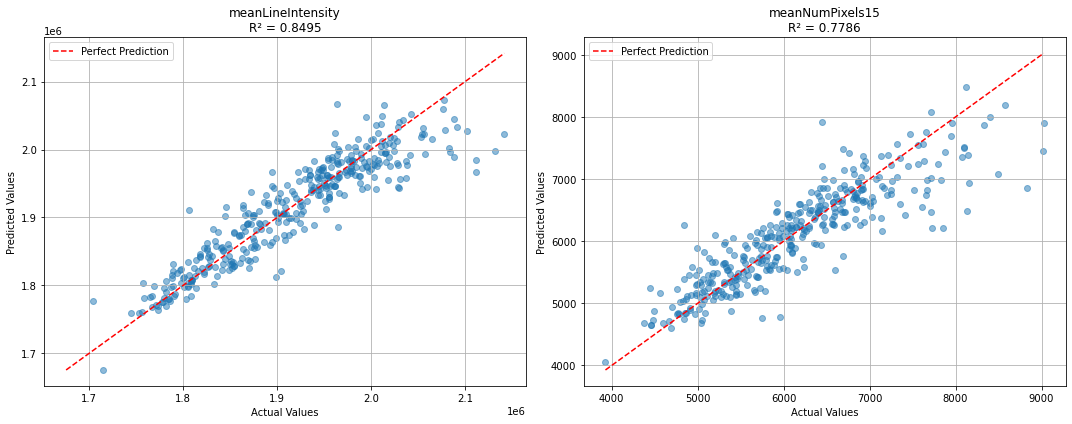

Fold:  4
Random Forest MSE: 523663947.1507
Random Forest R² scores: [0.8630399  0.80879328]


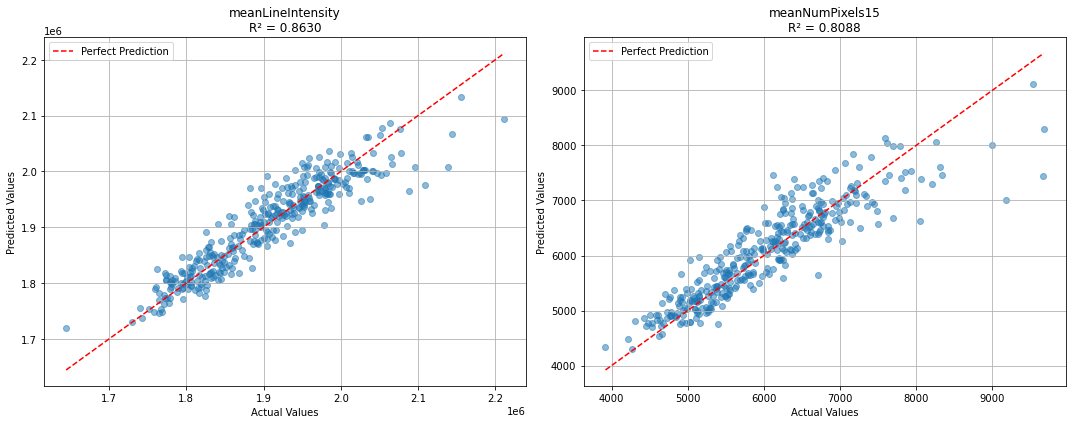

Cross-validation mean score [0.8483696  0.78613701]


In [12]:
from sklearn.ensemble import RandomForestRegressor

r2s = []
for fold_no, indices in enumerate(fold_indices):
    
    X_train, X_val = X[indices[0]], X[indices[1]]
    y_train, y_val = y[indices[0]], y[indices[1]]
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred, multioutput='raw_values')
    print(f'Fold:  {fold_no}')
    print(f'Random Forest MSE: {mse:.4f}')
    print(f'Random Forest R² scores: {r2}')
    r2s.append(r2)
    
    #plot predictions
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    target_names = ['meanLineIntensity', 'meanNumPixels15']

    for i, (ax, target) in enumerate(zip(axes, target_names)):
        # Plot predicted vs actual
        ax.scatter(y_val[:, i], y_pred[:, i], alpha=0.5)

        # Plot perfect prediction line
        min_val = min(y_val[:, i].min(), y_pred[:, i].min())
        max_val = max(y_val[:, i].max(), y_pred[:, i].max())
        ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')

        # Add labels and title
        ax.set_xlabel('Actual Values')
        ax.set_ylabel('Predicted Values')
        ax.set_title(f'{target}\nR² = {r2[i]:.4f}')
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()


r2s = np.array(r2s)
mean_score = r2s.mean(axis=0)
print(f'Cross-validation mean score {mean_score}')

In [10]:
from sklearn.ensemble import RandomForestRegressor

r2s = []
for fold_no, indices in enumerate(fold_indices):
    
    X_train, X_val = X[indices[0]], X[indices[1]]
    y_train, y_val = y[indices[0]], y[indices[1]]
    rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred, multioutput='raw_values')
    print(f'Fold:  {fold_no}')
    print(f'Random Forest MSE: {mse:.4f}')
    print(f'Random Forest R² scores: {r2}')
    r2s.append(r2)

r2s = np.array(r2s)
mean_score = r2s.mean(axis=0)
print(f'Cross-validation mean score {mean_score}')

Fold:  0
Random Forest MSE: 449637491.7220
Random Forest R² scores: [0.85328827 0.79457061]
Fold:  1
Random Forest MSE: 495080872.6302
Random Forest R² scores: [0.84052054 0.77373305]
Fold:  2
Random Forest MSE: 582096341.6828
Random Forest R² scores: [0.8397803  0.77396937]
Fold:  3
Random Forest MSE: 548298460.0026
Random Forest R² scores: [0.85090694 0.78145464]
Fold:  4
Random Forest MSE: 505860300.0987
Random Forest R² scores: [0.86769637 0.81471858]
Cross-validation mean score [0.85043848 0.78768925]
